In [1]:
import pandas as pd 
import numpy as np
import os 

os.chdir('../')
%pwd

'd:\\pythonProjects\\cab-fare-prices-prediction'

In [2]:
data=pd.read_csv('dataset/cleaned_dataset.csv')
data.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour,month
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,38.46,Haymarket Square,0.29,1022.25,0.0000,0.76,7.68,6,9,12
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,44.31,Haymarket Square,1.00,1003.17,0.1123,0.90,13.69,1,2,11
2,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,43.82,Haymarket Square,0.99,1002.59,0.0997,0.89,11.57,1,2,11
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,35.08,Haymarket Square,0.00,1013.71,0.0000,0.70,5.25,4,4,11
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,37.58,Haymarket Square,0.42,998.64,0.0000,0.71,11.30,3,3,11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164996 entries, 0 to 1164995
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   distance          1164996 non-null  float64
 1   cab_type          1164996 non-null  object 
 2   destination       1164996 non-null  object 
 3   source            1164996 non-null  object 
 4   price             1164996 non-null  float64
 5   surge_multiplier  1164996 non-null  float64
 6   name              1164996 non-null  object 
 7   date_time         1164996 non-null  object 
 8   temp              1164996 non-null  float64
 9   location          1164996 non-null  object 
 10  clouds            1164996 non-null  float64
 11  pressure          1164996 non-null  float64
 12  rain              1164996 non-null  float64
 13  humidity          1164996 non-null  float64
 14  wind              1164996 non-null  float64
 15  day               1164996 non-null  int64  
 16  

In [4]:
data['date_time']=pd.to_datetime(data['date_time'])
data.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour,month
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,38.46,Haymarket Square,0.29,1022.25,0.0000,0.76,7.68,6,9,12
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,44.31,Haymarket Square,1.00,1003.17,0.1123,0.90,13.69,1,2,11
2,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,43.82,Haymarket Square,0.99,1002.59,0.0997,0.89,11.57,1,2,11
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,35.08,Haymarket Square,0.00,1013.71,0.0000,0.70,5.25,4,4,11
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,37.58,Haymarket Square,0.42,998.64,0.0000,0.71,11.30,3,3,11


In [5]:
def extract_date_features(data):
    year=data.dt.year
    month=data.dt.month
    day=data.dt.day
    day_name=data.dt.day_name()
    hour=data.dt.hour
    return year, month, day,day_name, hour

In [6]:
year, month, day, day_name, hour=extract_date_features(data['date_time'])
data['day_name']=day_name 

<Axes: >

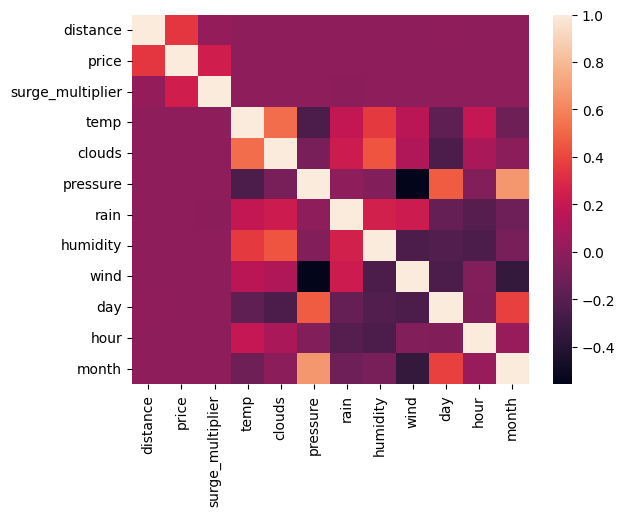

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.heatmap(data[['distance','price','surge_multiplier','temp','clouds','pressure','rain','humidity','wind','day','hour','month']].corr(),annot=False)


In [8]:
# ride per type 
ride_per_type = data.groupby('cab_type').count()['distance'].reset_index()

custom_colors = ['#C2185B', '#000000']

fig = px.pie(
    ride_per_type,
    names='cab_type',                 # Labels on the chart
    values='distance',
    color='cab_type',                 # Map color to cab_type
    color_discrete_sequence=custom_colors,
    title='Ride Count by Cab Type'   # Optional title
)

fig.update_traces(textinfo='label+percent')  # Show label and percent inside the chart
fig.show()

In [9]:
# pickup points
pickup=data.groupby(['source','cab_type']).count()['distance'].reset_index()
pickup.rename(columns={'distance':'pick-up count'}, inplace=True)
fig=px.sunburst(pickup, 
                # names='cab_type',   
                title='Cabs and pickup point',
                path=['cab_type', 'source'],
                  values='pick-up count',color='cab_type',
                  color_discrete_sequence=custom_colors
                  )
fig.update_traces(textinfo='label+percent entry')
fig.show()


In [10]:
# pickup points
pickup=data.groupby(['destination','cab_type']).count()['distance'].reset_index()
pickup.rename(columns={'distance':'des count'}, inplace=True)
fig=px.sunburst(pickup, 
                # names='cab_type',   
                title='Cabs and drop point',
                path=['cab_type', 'destination'],
                  values='des count',color='cab_type',
                  color_discrete_sequence=custom_colors
                  )
fig.update_traces(textinfo='label+percent entry')
fig.show()

In [11]:
# cab ride count vs price 
data['routes']=data['source']+'-'+data['destination']
routes=data.groupby(['routes','cab_type']).agg(price_mean=('price', 'mean'),
    ride_count=('price', 'count')).reset_index()
routes.head()
# routes.rename(columns={'index':'ride_count'}, inplace=True)

,routes,cab_type,price_mean,ride_count
0,Back Bay-Boston University,Lyft,14.698385,7677
1,Back Bay-Boston University,Uber,13.275371,8425
2,Back Bay-Fenway,Lyft,14.659162,7395
3,Back Bay-Fenway,Uber,12.871040,8239
4,Back Bay-Haymarket Square,Lyft,18.908352,7627


In [12]:
fig=px.scatter(routes,
               x='ride_count',
               y='price_mean',
               marginal_x='histogram',
               marginal_y='box',
            color='cab_type',
            # color_discrete_sequence=custom_colors,
            title='Price vs ride count based on distance').update_layout(template='plotly_white')
fig.show()

In [13]:
data.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour,month,day_name,routes
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,38.46,Haymarket Square,0.29,1022.25,0.0000,0.76,7.68,6,9,12,Sunday,Haymarket Square-North Station
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,44.31,Haymarket Square,1.00,1003.17,0.1123,0.90,13.69,1,2,11,Tuesday,Haymarket Square-North Station
2,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,43.82,Haymarket Square,0.99,1002.59,0.0997,0.89,11.57,1,2,11,Tuesday,Haymarket Square-North Station
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,35.08,Haymarket Square,0.00,1013.71,0.0000,0.70,5.25,4,4,11,Friday,Haymarket Square-North Station
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,37.58,Haymarket Square,0.42,998.64,0.0000,0.71,11.30,3,3,11,Thursday,Haymarket Square-North Station


In [14]:
# monthly average ride
monthly_avg_rides=data.groupby(['day','day_name','hour','surge_multiplier']).agg(
   {
   #  'price':'count',
    'distance':'mean',
    'price':'mean'
   }
).reset_index()


In [15]:
daily_avg_rides=monthly_avg_rides.groupby(['day_name','hour','surge_multiplier']).agg({
    'price':'count',
    'distance':'mean',
    'price':'mean'
}).reset_index()

# daily_avg_rides.rename(columns={'price':'ride_count'}, inplace=True)
daily_avg_rides['hour']=daily_avg_rides['hour'].astype(str)
# daily_avg_rides = daily_avg_rides.sort_values(['day_name', 'hour'])
# daily_avg_rides.head()
daily_avg_rides['hour'] = daily_avg_rides['hour'].astype(int)

In [16]:
surge_pivot=pd.pivot_table(daily_avg_rides,values='surge_multiplier',
                           index='day_name',columns='hour'
                           )
# surge_pivot = surge_pivot[sorted(surge_pivot.columns)]
# surge_pivot.columns = surge_pivot.columns.astype(int)
fig=px.imshow(surge_pivot,color_continuous_scale='RdBu_r',text_auto=True, title='Surge Pivot')
fig.show()

In [17]:

price_pivot=pd.pivot_table(daily_avg_rides,values='price',
                           index='day_name',columns='hour'
                           )
# surge_pivot = surge_pivot[sorted(surge_pivot.columns)]
# surge_pivot.columns = surge_pivot.columns.astype(int)

price_pivot = price_pivot[sorted(price_pivot.columns)]
fig=px.imshow(price_pivot,color_continuous_scale='viridis',text_auto=True, title='Price Pivot')
fig.show()

In [18]:
distance_pivot = pd.pivot_table(daily_avg_rides,
                            values="distance",
                            index="day_name",
                            columns="hour")
fig = px.imshow(distance_pivot, color_continuous_scale="viridis",text_auto=True).update_layout(template="plotly_white")
fig.show()

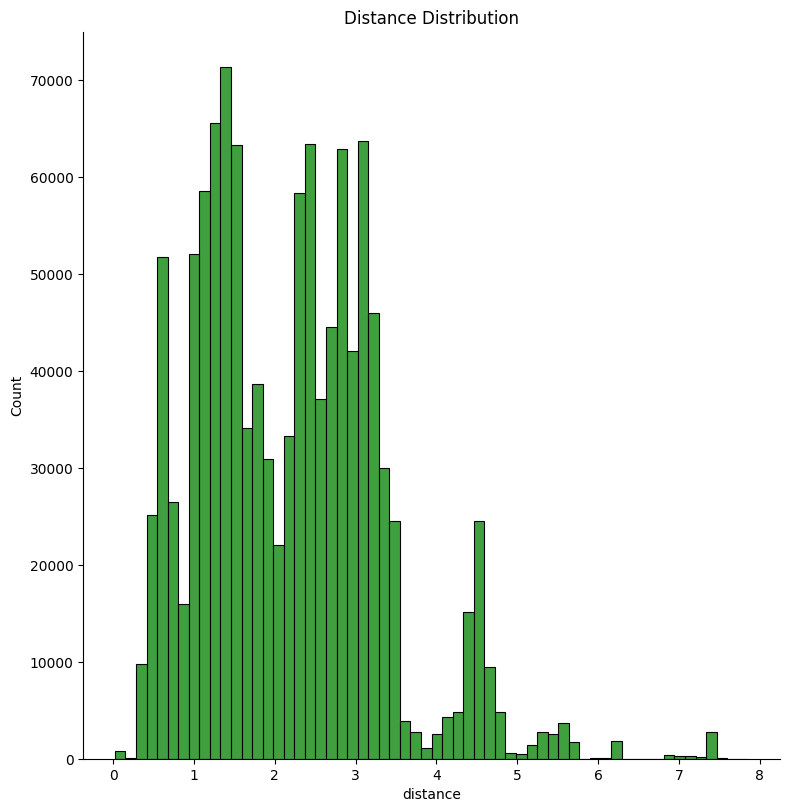

In [19]:
# distance count 
sns.displot(data=data, x='distance',bins=60,color='green',height=8)
plt.title('Distance Distribution')
plt.show()

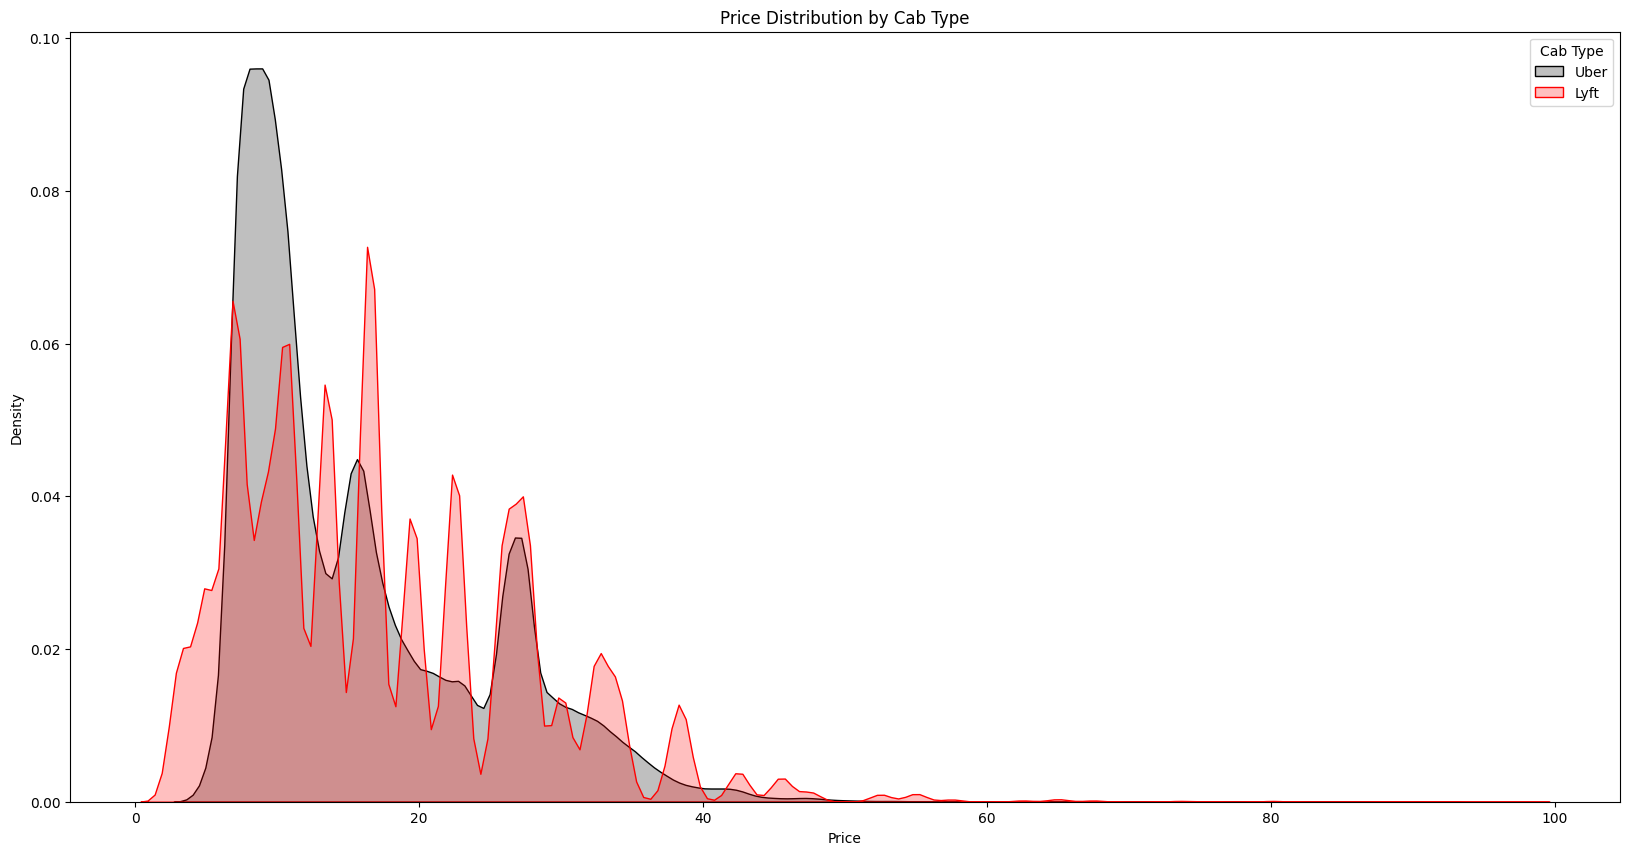

In [20]:
plt.figure(figsize=(20, 10))

sns.kdeplot(
    data=data[data['cab_type'] == 'Uber'],
    x='price',
    color='black',
    label='Uber',
    fill=True
)

sns.kdeplot(
    data=data[data['cab_type'] == 'Lyft'],
    x='price',
    color='red',
    label='Lyft',
    fill=True
)

plt.title('Price Distribution by Cab Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Cab Type')
plt.show()

In [21]:
data.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour,month,day_name,routes
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,38.46,Haymarket Square,0.29,1022.25,0.0000,0.76,7.68,6,9,12,Sunday,Haymarket Square-North Station
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,44.31,Haymarket Square,1.00,1003.17,0.1123,0.90,13.69,1,2,11,Tuesday,Haymarket Square-North Station
2,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,43.82,Haymarket Square,0.99,1002.59,0.0997,0.89,11.57,1,2,11,Tuesday,Haymarket Square-North Station
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,35.08,Haymarket Square,0.00,1013.71,0.0000,0.70,5.25,4,4,11,Friday,Haymarket Square-North Station
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,37.58,Haymarket Square,0.42,998.64,0.0000,0.71,11.30,3,3,11,Thursday,Haymarket Square-North Station


C:\Users\26amr\AppData\Local\Temp\ipykernel_27492\4287436983.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\26amr\AppData\Local\Temp\ipykernel_27492\4287436983.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\26amr\AppData\Local\Temp\ipykernel_27492\4287436983.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\26amr\AppData\Local\Temp\ipykernel_27492\4287436983.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

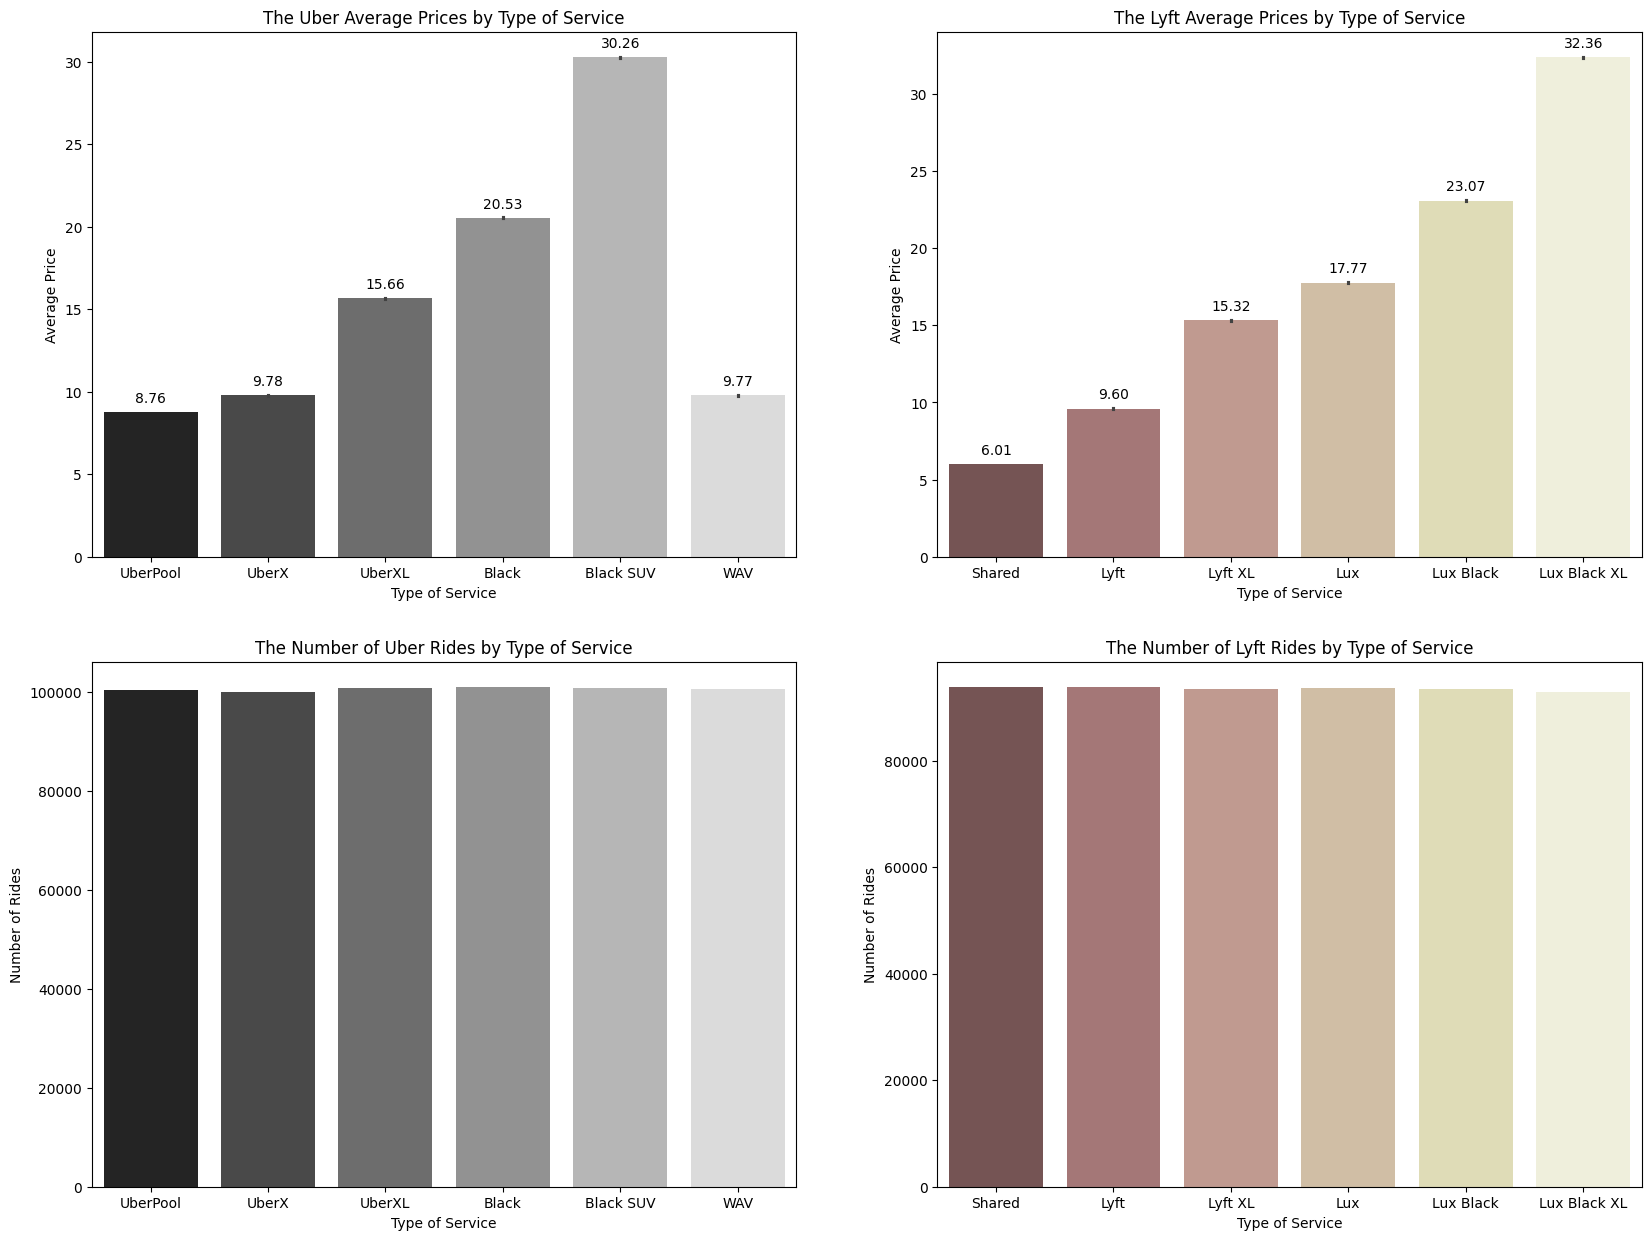

In [22]:
# The Average price of rides by type of service
# For Uber (dark/neutral theme)

uber_order =[ 'UberPool', 'UberX', 'UberXL', 'Black','Black SUV','WAV' ]
lyft_order = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']
uber_palette = sns.color_palette("gray", len(uber_order))

# For Lyft (pinkish/vibrant theme)
lyft_palette = sns.color_palette("pink", len(lyft_order))
fig, ax = plt.subplots(2,2, figsize = (20,15))
ax1 = sns.barplot(x = data[data['cab_type'] == 'Uber'].name, y = data[data['cab_type'] == 'Uber'].price , ax = ax[0,0], order = uber_order, palette=uber_palette )
ax2 = sns.barplot(x = data[data['cab_type'] == 'Lyft'].name, y = data[data['cab_type'] == 'Lyft'].price , ax = ax[0,1], order = lyft_order,  palette=lyft_palette)
ax3 = sns.barplot(x = data[data['cab_type'] == 'Uber'].groupby('name').name.count().index, y = data[data['cab_type'] == 'Uber'].groupby('name').name.count(), ax = ax[1,0] ,order = uber_order, palette=uber_palette)
ax4 = sns.barplot(x = data[data['cab_type'] == 'Lyft'].groupby('name').name.count().index, y = data[data['cab_type'] == 'Lyft'].groupby('name').name.count(), ax = ax[1,1],order = lyft_order,  palette=lyft_palette)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax2.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax3.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax4.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax1.set_title('The Uber Average Prices by Type of Service')
ax2.set_title('The Lyft Average Prices by Type of Service')
ax3.set_title('The Number of Uber Rides by Type of Service')
ax4.set_title('The Number of Lyft Rides by Type of Service')
plt.show()

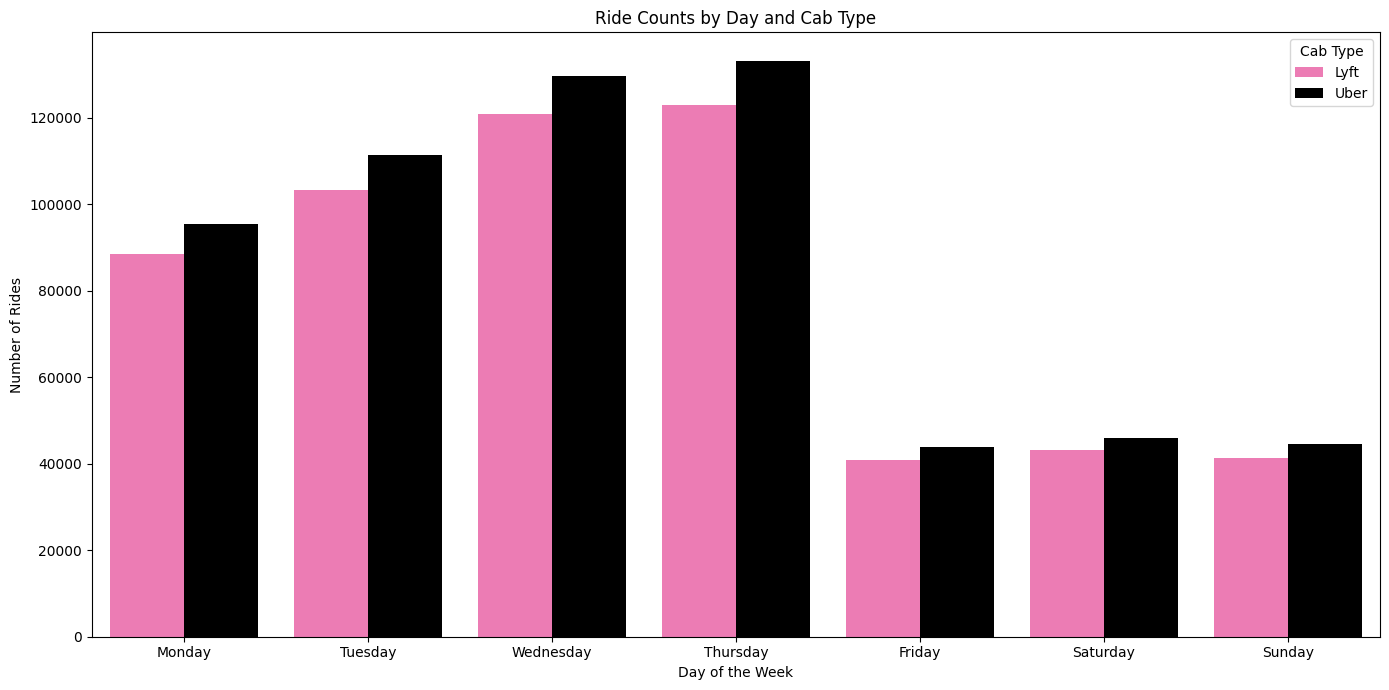

In [23]:
# the dustribution of rides in weekdays 
# uber_day_count = data[data['cab_type'] == 'Uber']['day'].value_counts()
# uber_day_count = uber_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])
# lyft_day_count = data[data['cab_type'] == 'Lyft']['day'].value_counts()
# lyft_day_count = lyft_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])
ride_counts = data.groupby(['cab_type', 'day_name']).agg({'price': 'count'}).rename(columns={'price': 'count'}).reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ride_counts['day_name'] = pd.Categorical(ride_counts['day_name'], categories=weekday_order, ordered=True)
ride_counts = ride_counts.sort_values(['day_name', 'cab_type'])
plt.figure(figsize=(14, 7))
sns.barplot(data=ride_counts, x='day_name', y='count', hue='cab_type', palette={'Uber': 'black', 'Lyft': 'hotpink'})

plt.title('Ride Counts by Day and Cab Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='Cab Type')
plt.tight_layout()
plt.show()

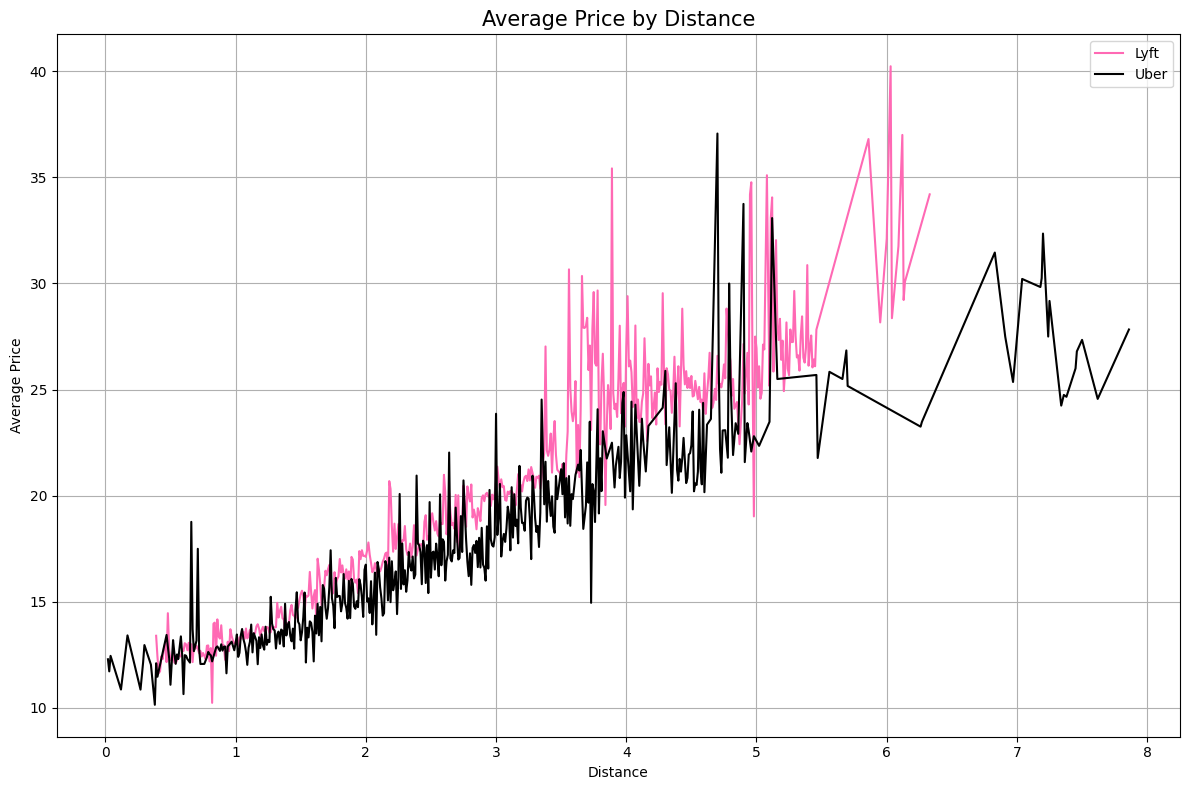

In [24]:
# average price distribution by distance 
fig, ax = plt.subplots(figsize=(12, 8))

# Group once for Lyft
lyft_group = data[data['cab_type'] == 'Lyft'].groupby('distance')['price'].mean()
ax.plot(lyft_group.index, lyft_group.values, label='Lyft', color='hotpink')

# Group once for Uber
uber_group = data[data['cab_type'] == 'Uber'].groupby('distance')['price'].mean()
ax.plot(uber_group.index, uber_group.values, label='Uber', color='black')

# Styling
ax.set_title('Average Price by Distance', fontsize=15)
ax.set_xlabel('Distance')
ax.set_ylabel('Average Price')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()